In [2]:
# set up

import shap
import random
import numpy  as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.gridspec as gridspec

In [4]:
# simulate a data set with n = 1000 individuals

np.random.seed(119)

n = 1000

x1 = np.random.normal(0, 1, size = n)
x2 = np.random.normal(0, 1, size = n)
x3 = np.random.normal(0, 1, size = n)
z  = np.random.normal(0, 1, size = n)

y = 1 + 2*x1 - 3*x2 + 4*(x3**2) + z

df = pd.DataFrame({'y': y,
                   'x1': x1,
                   'x2': x2,
                   'x3': x3})
df

,y,x1,x2,x3
0,-2.140914,-0.007511,1.052220,-0.375158
1,8.168881,1.204693,-1.424674,-0.441100
2,3.737126,0.650439,-0.048743,-0.500371
3,0.253167,-0.763062,0.697286,-0.788722
4,5.068440,-0.539368,-1.534844,-0.312336
...,...,...,...,...
995,0.686447,-0.278817,0.417915,0.128046
996,10.318400,0.427738,-2.455617,0.360393
997,-4.244828,-0.801121,1.184943,-0.597834
998,7.094018,-0.016492,0.811733,1.465744


In [5]:
# define linear model formula
f = 'y~ x1 + x2 + I(x3**2)'

In [6]:
# fit linear regression model
model_formula = f
model = sm.OLS.from_formula(model_formula, data=df)
model = model.fit()

# view model coefficients
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.441e+04
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        08:47:37   Log-Likelihood:                -1385.6
No. Observations:                1000   AIC:                             2779.
Df Residuals:                     996   BIC:                             2799.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9594      0.038     25.544      0.0

In [9]:
# save X matrix
X = df[['x1', 'x2', 'x3']]

# make a predict function for use with shap package
def predict_fn(data_as_array):
    return model.predict(data_as_array)

# save SHAP explainer
explainer = shap.explainers.Exact(predict_fn, X)

# save SHAP values
shap_values = explainer(X)

In [13]:
# visualizations

np.random.seed(119)

# Figure 1a - waterfall plot for random individual
random_person = np.random.randint(0, len(X))
shap.plots.waterfall(shap_values[random_person], show = False)

# save plot
fig = plt.gcf()
fig.savefig("shap_individual_waterfall.png", bbox_inches='tight', dpi=300)
plt.close()

In [14]:
# Figure 1b - force plot for the same random individual
shap.force_plot(
    shap_values.base_values.mean(),         # baseline prediction
    shap_values[random_person].values,      # SHAP values for this individual
    X.iloc[random_person, :],               # actual feature values
    matplotlib=True, show = False
)

# save plot
fig = plt.gcf()
fig.savefig("shap_individual_force.png", bbox_inches='tight', dpi=300)
plt.close()

In [15]:
# Figure 2a - summary plot

shap.summary_plot(shap_values, X, show = False)

# save plot
fig = plt.gcf()
fig.savefig("shap_beeswarm.png", bbox_inches='tight', dpi=300)
plt.close()

/tmp/ipython-input-3465325400.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, show = False)


In [16]:
# Figure 2b - feature importance plot

shap.summary_plot(shap_values, X, plot_type="bar", show = False)

# save plot
fig = plt.gcf()
fig.savefig("shap_feature_importance.png", bbox_inches='tight', dpi=300)
plt.close()

/tmp/ipython-input-4292338197.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="bar", show = False)


In [17]:
# Figure 3a - dependence plot x1
shap.dependence_plot('x1', shap_values.values, X, interaction_index= None, show = False)

# save plot
fig = plt.gcf()
fig.savefig("shap_dependence_1.png", bbox_inches='tight', dpi=300)

In [18]:
# Figure 3b - dependence plot x2
shap.dependence_plot('x2', shap_values.values, X, interaction_index= None, show = False)

# save plot
fig = plt.gcf()
fig.savefig("shap_dependence_2.png", bbox_inches='tight', dpi=300)

In [19]:
# Figure 3c - dependence plot x3
shap.dependence_plot('x3', shap_values.values, X, interaction_index= None, show = False)

# save plot
fig = plt.gcf()
fig.savefig("shap_dependence_3.png", bbox_inches='tight', dpi=300)

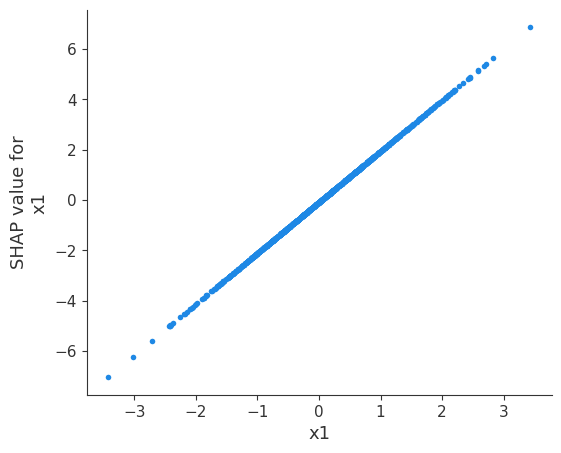

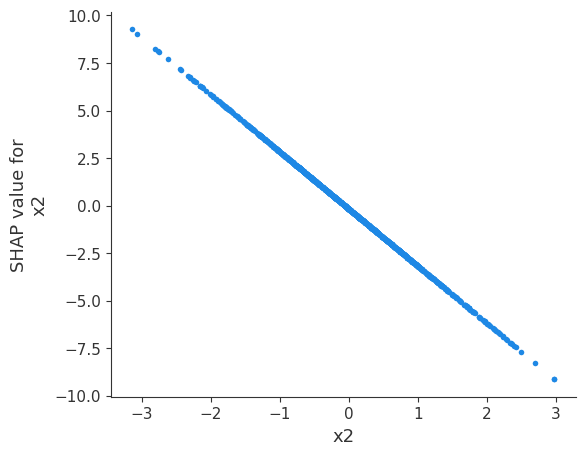

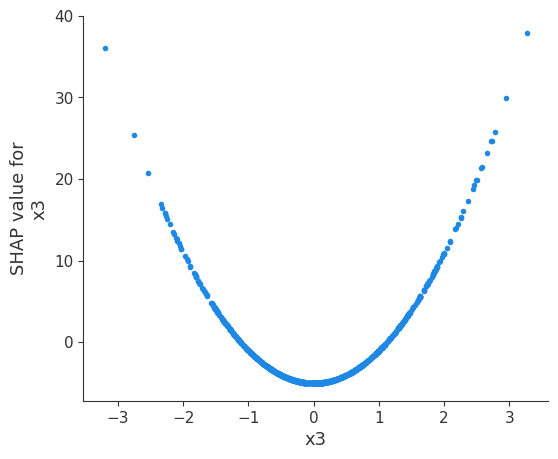

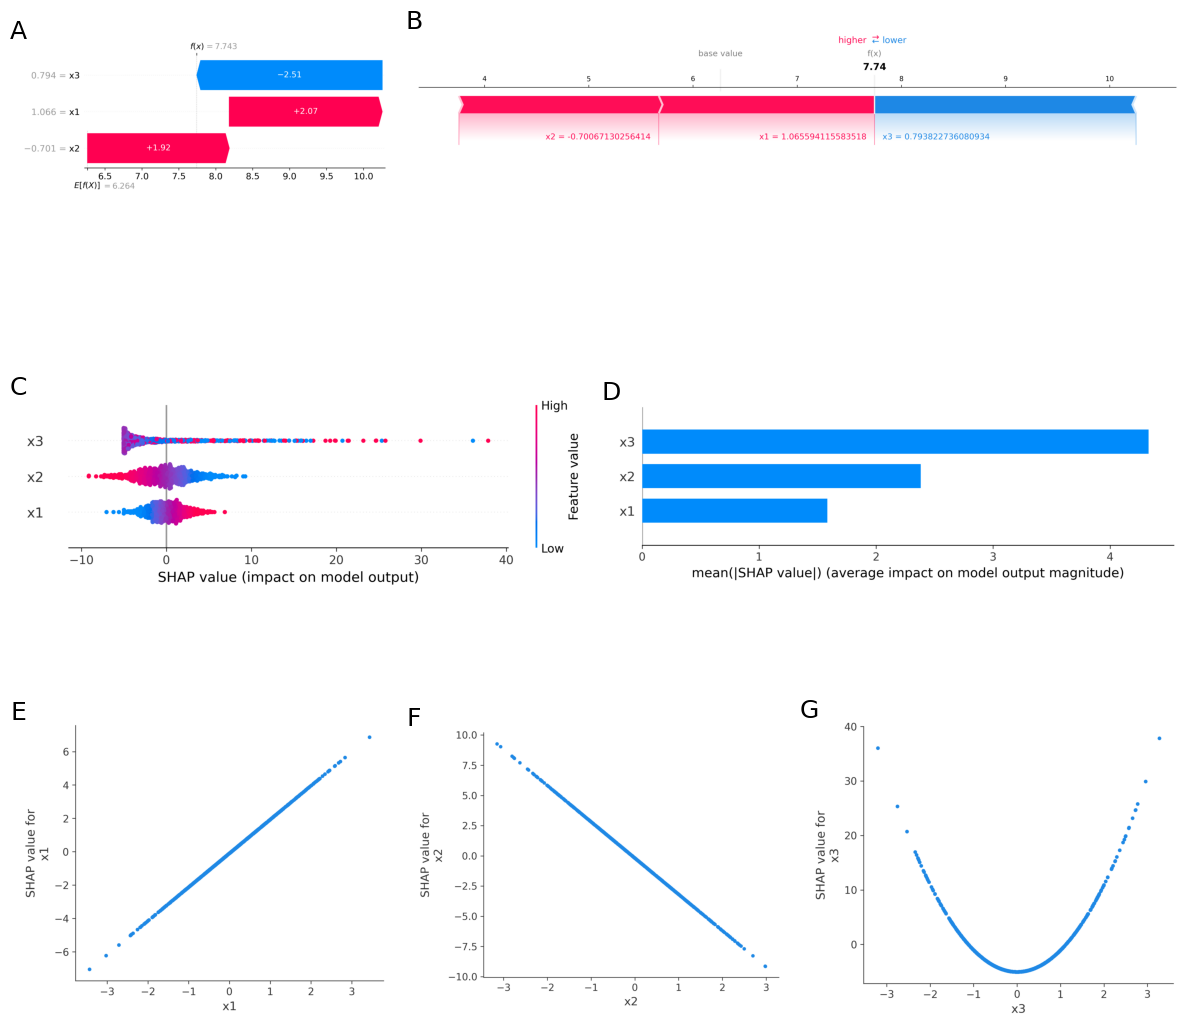

In [20]:
big_fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 3, figure=big_fig, height_ratios=[1,1,1])  # 3 rows, 3 columns

# for row 1: plot A takes 1/3, plot B takes 2/3 (so A = 1 col, B = 2 cols)
axA = big_fig.add_subplot(gs[0, 0])
axB = big_fig.add_subplot(gs[0, 1:3])

# for row 2: plot C 1/2 width (2 cols), plot D 1/2 width (2 cols)
# New gridspec with 4 columns
big_fig.clf()
gs = gridspec.GridSpec(3, 6, figure=big_fig, height_ratios=[1,1,1])

# Row 1
axA = big_fig.add_subplot(gs[0, 0:2])    # 2 out of 6 columns = 1/3
axB = big_fig.add_subplot(gs[0, 2:6])    # 4 out of 6 columns = 2/3

# Row 2 (half-half split: each 3 out of 6 columns)
axC = big_fig.add_subplot(gs[1, 0:3])
axD = big_fig.add_subplot(gs[1, 3:6])

# Row 3 (three equal plots each 1/3 = 2 out of 6 columns each)
axE = big_fig.add_subplot(gs[2, 0:2])
axF = big_fig.add_subplot(gs[2, 2:4])
axG = big_fig.add_subplot(gs[2, 4:6])

axes = [axA, axB, axC, axD, axE, axF, axG]
image_files = [
    "shap_individual_waterfall.png",
    "shap_individual_force.png",
    "shap_beeswarm.png",
    "shap_feature_importance.png",
    "shap_dependence_1.png",
    "shap_dependence_2.png",
    "shap_dependence_3.png"
]

for ax, img_file, label in zip(axes, image_files, ['A','B','C','D','E','F','G']):
    # Load image
    img = mpimg.imread(img_file)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    ax.text(0.05, 0.90, label, fontsize=18, ha='center')

plt.tight_layout()
plt.savefig("overall_plots.png", bbox_inches='tight', dpi=300)
plt.show()